In [5]:
%load_ext autoreload
%autoreload 2

import MM_Util as mm
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
mol_pucker, mol_fem = mm.Mol('sample_data/'), mm.Mol('sample_data/')

mol_pucker.gromacs('ang_ring.xvg')
mol_fem.gromacs('fem_angles.xvg')

/home/eugene/Documents/repos/artdep/MM_Util/plot.py:234: RuntimeWarning: divide by zero encountered in log
  Hall = - R * Temp * np.log(Hall)
/home/eugene/Documents/repos/artdep/MM_Util/plot.py:245: RuntimeWarning: divide by zero encountered in log
  Hpuck = - R* Temp * np.log(Hpuck)


-17737.533520964713
1C4      47725
4C1          5
1,4B       609
B1,4       125
2,5B       203
B2,5       321
3,6B       214
B3,6       238
1H2          0
2H1          0
2H3          0
3H2          0
3H4          0
4H3          0
4H5          0
5H4          0
5H6          0
6H5          0
6H1          0
1H6          0
1S3        296
3S1          0
5S1          0
1S5          0
6S2          0
2S6          0
1E         180
E1           0
2E          37
E2          47
3E           1
E3           0
4E           0
E4           0
5E           0
E5           0
6E           0
E6           0


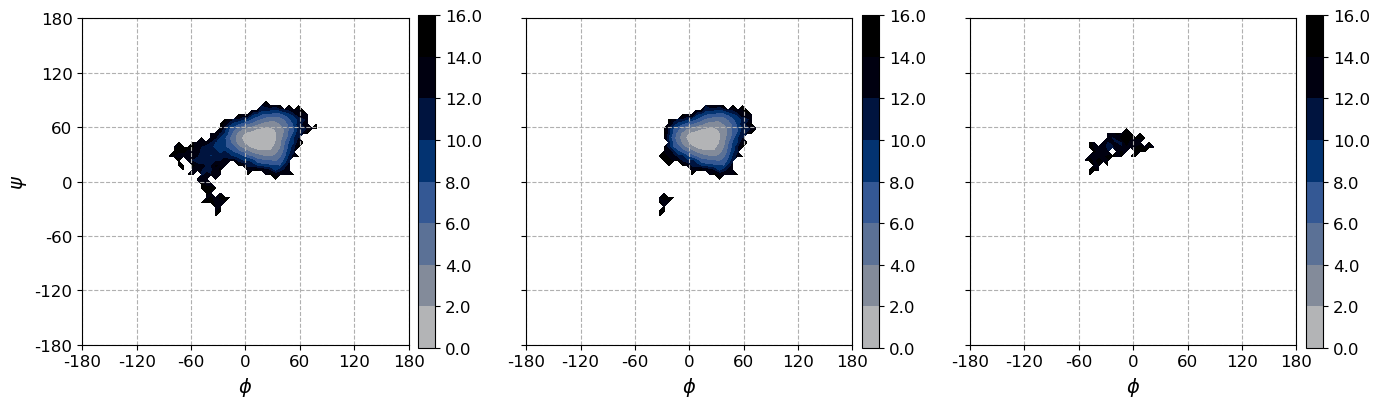

In [14]:
 plot = mm.Plot()
plot.cmap(map="oslo", offset=0.2)
plot.puckers_hist(mol_pucker, mol_fem)